# Introduction
**Dataset Source**: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

I will be analyzing data on cervical cancer risk factors. The researchers surveyed almost 900 women at the the University Hospital of Caracas in Caracas, Venezuela. The dataset includes numerical information such as the age of participants, number of sexual partners, or years using hormonal contraceptives and boolean information such as does the participant smoke, have HPV, or use an IUD. 

I wanted to investigate this topic because as a woman, women's health is important to me. Women with health concerns are often discredited and their concerns ignored. It is all to common to hear stories of women going to their doctor for help and being told they're wrong or overreacting, only to find out later their condition was as serious as they had thought and the doctor was wrong. It is important for women to be aware of behaviors that could be putting them at risk to protect themselves or to be able to recognize when their symptoms could be part of a bigger issue. The sooner a health condition is caught, especially one as serious as cancer, the sooner treatment can begin, and the better odds someone has of recovering. 

In this project, I want to identify the behaviors most closely associated with getting cervical cancer and if there are behaviors when combined, make the risk higher. 

# Data Information

In [1]:
import pandas as pd

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/gbraga12/DH140-FinalProject/main/cervical_cancer_risk_factors.csv')

### Initial Processing

In [29]:
# Change ? in dataset to None
for i in data:
    data.loc[data[i] == '?', i] = None

# Convert at column datatypes into int
columns = data.columns
for j in columns:
    data[j] = pd.to_numeric(data[j])

### Data Statistics

In [28]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Visualizations

<AxesSubplot: ylabel='Frequency'>

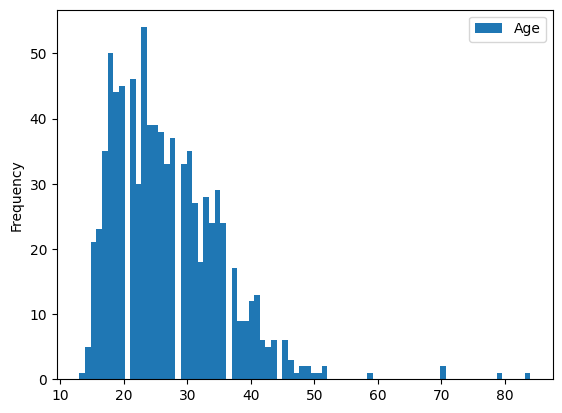

In [33]:
data.plot(y = 'Age', kind = 'hist', bins = 80)

In [50]:
graphcolors = []
for i in data['Dx:HPV']:
    if i == 0:
        graphcolors.append('yellow')
    else:
        graphcolors.append('black')

<AxesSubplot: >

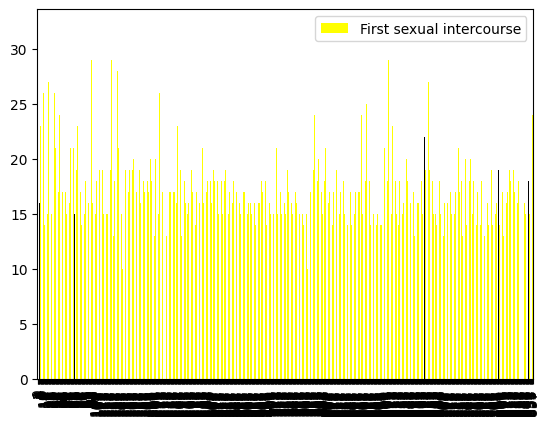

In [53]:
data.plot(y = 'First sexual intercourse', kind = 'bar', label = None, color = graphcolors)

<AxesSubplot: xlabel='Age', ylabel='Hormonal Contraceptives (years)'>

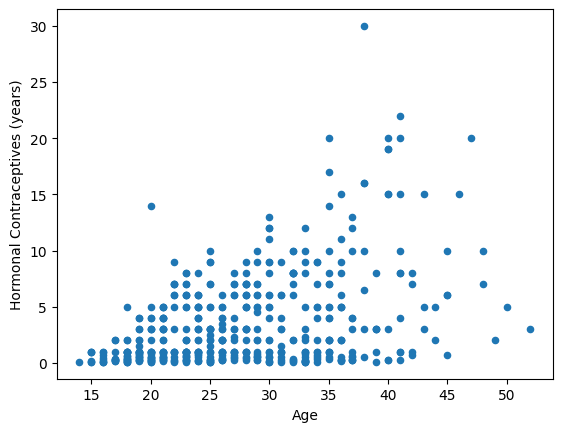

In [59]:
trunc_data = data.loc[(data['Hormonal Contraceptives (years)'] > 0.0) & (data['Hormonal Contraceptives (years)'] != None)
                     ]
trunc_data.plot(x = 'Age', y = 'Hormonal Contraceptives (years)', kind = 'scatter')

<AxesSubplot: >

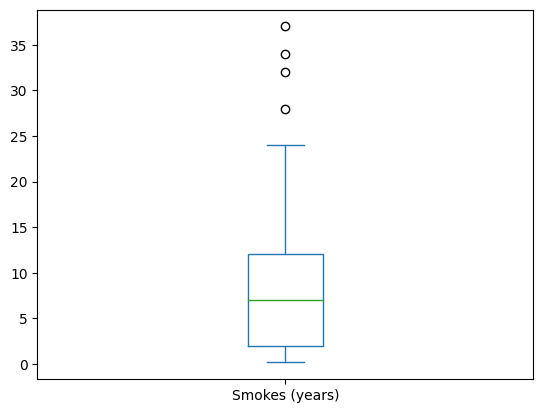

In [72]:
trunc_data = data.loc[(data['Smokes (years)'] > 0.0) & (data['Smokes (years)'] != None)
                     ]

trunc_data.plot(y = 'Smokes (years)', kind = 'box')

### Preliminary Analysis

In [70]:
data.loc[:, 'Dx:HPV'].mean()

0.02097902097902098

Using the above line of code, it is determined that 2% of the women surveyed have been diagnosed with cervical cancer. A graphic I would like to make is find the percentages of women have each of the STDs the researchers were looking for a make a bar chart showing them.

I would also like to make graphs showing women's risk factors and highlighting the women who have been diagnosed with an STD in another color. I attempted this in the visualizations section above, however it did not turn out very readable. I'll have to find another way to accomplish this goal.

To show how certain risk factors are more connected to different STDs, I'd like to make a network visualization of all the women diagnosed and what activities they participated in. 

A final visualization I would like to make is one using a heat map to show the correlation between risk activities and STDs. To do so, I will have to do some data processing and make some subjective decisions on what is risky. For example, the more seuxal partners someone has, the more likely someone is to get an STD. I will probably have to choose a number to be the crossover between a lower risk and higher risk number of partners. 